In [1]:
import numpy as np
import pandas as pd
from gurobipy import GRB
import gurobipy as gp
import random
import networkx as nx
import math

In [2]:
NodeCount = 8
GraphDensityCoefficient = 0.5
MaxCostArc = 20
RequiredInfo = 20
CommodityCount = 5
MaxDemandCommodity = 20
MaxCapacityArc = 20

random.seed(10)

N = [i+1 for i in range(NodeCount)]
Commodities = [i+1 for i in range(CommodityCount)]
NodeNodeAdjacencyMatrix = np.zeros((NodeCount,NodeCount))


ArcProbability = np.zeros((NodeCount,NodeCount))

for i in range(NodeCount-1):
    for j in range(i+1,NodeCount):
        ArcProbability[i,j] = random.uniform(0,1)
        if ArcProbability[i,j] > GraphDensityCoefficient:
            
            NodeNodeAdjacencyMatrix[i,j] = 1
            
    if sum(NodeNodeAdjacencyMatrix[i]) == 0:
        
        NodeNodeAdjacencyMatrix[i,NodeCount-1] = 1

ArcCount = int(sum(sum(NodeNodeAdjacencyMatrix)))



In [3]:
NodeNodeAdjacencyMatrix

array([[0., 1., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
ArcCount    

18

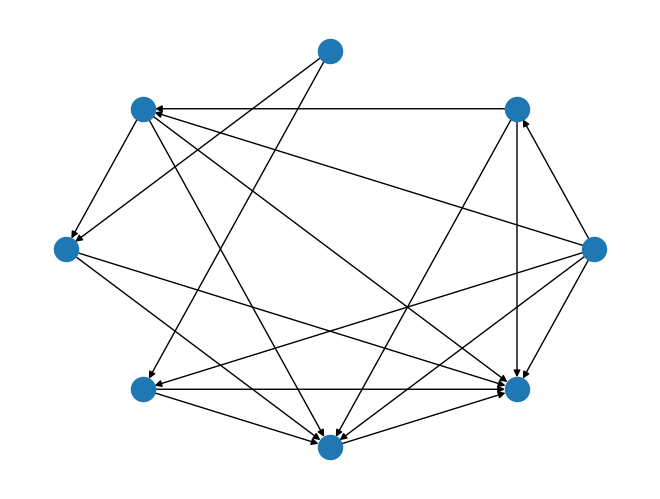

In [5]:
G = nx.from_numpy_array(NodeNodeAdjacencyMatrix,create_using=nx.DiGraph())
nx.draw_circular(G,arrows=True)

In [6]:
NodeNodeAdjacencyList = {i:[] for i in N}
CostDict = {}
CapacityDict = {}
ArcDict = {i:0 for i in range(ArcCount)}
InfoDict = {i:random.randint(0,RequiredInfo/2) for i in N}

ArcCounter = 0

for i in range(NodeCount):
    for j in range(NodeCount):
        if NodeNodeAdjacencyMatrix[i][j] == 1:
            NodeNodeAdjacencyList[i+1].append(j+1)
            CostDict[ArcCounter]= random.randint(0,MaxCostArc)
            CapacityDict[ArcCounter] = random.randint(MaxCapacityArc/2,MaxCapacityArc)
            ArcDict[ArcCounter] = (i+1,j+1)
            ArcCounter += 1

In [7]:
ArcDict

{0: (1, 2),
 1: (1, 4),
 2: (1, 6),
 3: (1, 7),
 4: (1, 8),
 5: (2, 4),
 6: (2, 7),
 7: (2, 8),
 8: (3, 5),
 9: (3, 6),
 10: (4, 5),
 11: (4, 7),
 12: (4, 8),
 13: (5, 7),
 14: (5, 8),
 15: (6, 7),
 16: (6, 8),
 17: (7, 8)}

In [8]:
NodeNodeAdjacencyList

{1: [2, 4, 6, 7, 8],
 2: [4, 7, 8],
 3: [5, 6],
 4: [5, 7, 8],
 5: [7, 8],
 6: [7, 8],
 7: [8],
 8: []}

In [9]:
# InfoList = [random.randint(0,MaxInfoNode) for i in N]
InfoDict

{1: 0, 2: 3, 3: 2, 4: 3, 5: 4, 6: 8, 7: 5, 8: 3}

In [10]:
CostDict

{0: 10,
 1: 17,
 2: 13,
 3: 2,
 4: 18,
 5: 16,
 6: 7,
 7: 7,
 8: 1,
 9: 9,
 10: 2,
 11: 2,
 12: 12,
 13: 11,
 14: 4,
 15: 3,
 16: 5,
 17: 11}

In [11]:
CapacityDict

{0: 20,
 1: 17,
 2: 17,
 3: 20,
 4: 15,
 5: 12,
 6: 16,
 7: 10,
 8: 17,
 9: 19,
 10: 18,
 11: 12,
 12: 19,
 13: 19,
 14: 11,
 15: 17,
 16: 13,
 17: 16}

In [12]:
B_k = [random.randint(1,MaxDemandCommodity) for i in range(CommodityCount)]
B_k

[14, 15, 8, 9, 5]

In [13]:
Origin = [random.randint(1,math.floor(NodeCount/2)) for i in range(CommodityCount)]
Destination = [random.randint(math.floor(NodeCount/2)+1,NodeCount) for i in range(CommodityCount)]

In [14]:
Origin

[2, 1, 3, 4, 3]

In [15]:
Destination

[6, 6, 6, 8, 7]

In [16]:
def Reachable(visited, graph, node): 
    visited.append(node)
    queue.append(node)
    Reachable = []

    while queue:          
        m = queue.pop(0) 
#         print (m, end = " ") 
        Reachable.append(m)

        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    return Reachable

In [17]:
for i in range(len(Origin)):
    visited = [] # List for visited nodes.
    queue = []     #Initialize a queue
    ReachableList = Reachable(visited,NodeNodeAdjacencyList,Origin[i])
    print(i,Origin[i],Destination[i],ReachableList)
    k = len(ReachableList)

# #             break
    if Destination[i] not in ReachableList:
        for j in range(k):
            if ReachableList[j]>Origin[i]:
                Destination[i] = ReachableList[j]
                k
        

0 2 6 [2, 4, 7, 8, 5]
1 1 6 [1, 2, 4, 6, 7, 8, 5]
2 3 6 [3, 5, 6, 7, 8]
3 4 8 [4, 5, 7, 8]
4 3 7 [3, 5, 6, 7, 8]


In [18]:
Destination

[5, 6, 6, 8, 7]

In [19]:
B_k_Dict = {i:[] for i in Commodities}
Origin_Dict = {i:[] for i in Commodities}
Destination_Dict = {i:[] for i in Commodities}
for i in range(CommodityCount):
    B_k_Dict[i+1]=B_k[i]
    Origin_Dict[i+1] = Origin[i]
    Destination_Dict[i+1] = Destination[i]

In [20]:
NodeNodeAdjacencyListWithDummyArcs = {i:[] for i in N}
PathCost = {}
# CapacityListInitial = {}
InitialHighCost = MaxCostArc*ArcCount + 1
InitialHighCapacity = MaxDemandCommodity*ArcCount + 1

for i in range(len(Origin)):

    NodeNodeAdjacencyListWithDummyArcs[Origin[i]].append(Destination[i])

NodeNodeAdjacencyListWithDummyArcs

{1: [6], 2: [5], 3: [6, 7], 4: [8], 5: [], 6: [], 7: [], 8: []}

In [21]:
PathSetForCommodity = {i:[] for i in Commodities}
Paths = [i for i in range(CommodityCount)]

for i in range(CommodityCount):
    PathSetForCommodity[i+1].append(Paths[i])
PathSetForCommodity

{1: [0], 2: [1], 3: [2], 4: [3], 5: [4]}

In [22]:
Paths

[0, 1, 2, 3, 4]

In [23]:
PathDict = {i:[] for i in Paths}
NodesInPath = {i:[] for i in Paths}
for i in Paths:
    PathDict[i].append((Origin[i],Destination[i]))
    NodesInPath[i].append(Origin[i])
    NodesInPath[i].append(Destination[i])
PathDict

{0: [(2, 5)], 1: [(1, 6)], 2: [(3, 6)], 3: [(4, 8)], 4: [(3, 7)]}

In [24]:
NodesInPath

{0: [2, 5], 1: [1, 6], 2: [3, 6], 3: [4, 8], 4: [3, 7]}

In [25]:
PathCost = {p:InitialHighCost for p in Paths}
PathInfo = {p:0 for p in Paths}
for i in Paths:
    for k in NodesInPath[i]:
        PathInfo[i] += InfoDict[k]
    for j in range(ArcCount):
        if list(ArcDict.values())[j] == (PathDict[i][0]):
            ArcIndex = list(ArcDict.values())[j]
            PathCost[i] = CostDict[j]
for i in Paths:
    if PathCost[i] == InitialHighCost:
        PathInfo[i] = RequiredInfo

        
#         else:
#             PathCost[i] = InitialHighCost
    
Counter = 0

for i in N:
    for j in N:
        if (i in Origin) and (j in Destination):
            
            if NodeNodeAdjacencyMatrix[i-1,j-1] == 0:
                CapacityDict[ArcCount+Counter] = InitialHighCapacity
                CostDict[ArcCount+Counter] = InitialHighCost
                NodeNodeAdjacencyMatrix[i-1,j-1] = 1
                ArcDict[ArcCount+Counter] = (i,j)
                
                Counter += 1
                
#             else:
#                 PathCost[(i,j)] = CostList[(i,j)]
ArcCountWithDummyArcs = ArcCount + Counter

In [26]:
PathInfo

{0: 20, 1: 8, 2: 10, 3: 6, 4: 20}

In [27]:
PathCost

{0: 361, 1: 13, 2: 9, 3: 12, 4: 361}

In [28]:
CapacityDict

{0: 20,
 1: 17,
 2: 17,
 3: 20,
 4: 15,
 5: 12,
 6: 16,
 7: 10,
 8: 17,
 9: 19,
 10: 18,
 11: 12,
 12: 19,
 13: 19,
 14: 11,
 15: 17,
 16: 13,
 17: 16,
 18: 361,
 19: 361,
 20: 361,
 21: 361,
 22: 361,
 23: 361}

In [29]:
ArcDict

{0: (1, 2),
 1: (1, 4),
 2: (1, 6),
 3: (1, 7),
 4: (1, 8),
 5: (2, 4),
 6: (2, 7),
 7: (2, 8),
 8: (3, 5),
 9: (3, 6),
 10: (4, 5),
 11: (4, 7),
 12: (4, 8),
 13: (5, 7),
 14: (5, 8),
 15: (6, 7),
 16: (6, 8),
 17: (7, 8),
 18: (1, 5),
 19: (2, 5),
 20: (2, 6),
 21: (3, 7),
 22: (3, 8),
 23: (4, 6)}

In [30]:
Delta_ij_p = {i:[0]*ArcCountWithDummyArcs for i in Paths}

for p in Paths:
    for i in ArcDict:    
            if ArcDict[i] in PathDict[p]:
                Delta_ij_p[p][i] = 1
Delta_ij_p

{0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 1: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]}

In [31]:
NodeNodeAdjacencyMatrix

array([[0., 1., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [32]:
def PathModel():
    m1 = gp.Model("PathModel")
    
    Flow = m1.addVars(Paths,Commodities,name="flow")

    NetworkCost = 0

    for k in Commodities:
        for p in PathSetForCommodity[k]:
            NetworkCost += B_k_Dict[k] * PathCost[p] * Flow[p,k]
        for p in Paths:
            if p not in PathSetForCommodity[k]:
                m1.addConstr(Flow[p,k]==0)
    
    m1.setObjective(NetworkCost, GRB.MINIMIZE)

    ArcFlow = [0]*ArcCountWithDummyArcs
    InfoCollected = 0

    for k in Commodities:
        for p in PathSetForCommodity[k]:
            for i in range(len(Delta_ij_p[p])):
                if Delta_ij_p[p][i] == 1:
                    ArcFlow[i] += B_k_Dict[k] * Flow[p,k]
            InfoCollected += PathInfo[p]* Flow[p,k]
    
    CapacityConstraint = [0]*ArcCountWithDummyArcs
    
#     for i in range(ArcCountWithDummyArcs):
    CapacityConstraint = m1.addConstrs((ArcFlow[i] <= CapacityDict[i] for i in range(ArcCountWithDummyArcs)),name="Cap")
        
    InfoThresholdConstraint = m1.addConstr(InfoCollected>=RequiredInfo,name="InfoT")
    
    FlowConstraint = m1.addConstrs(((Flow.sum('*',k))==1 for k in Commodities),name="FlowPart")
            
    m1.write("C:\PhD IE\Optimization Models for Large Networks\path.lp")
    print(InfoThresholdConstraint)
    m1.optimize()
    
    if m1.Status == GRB.OPTIMAL:
        OptimalFlow = m1.getAttr('X',Flow)
#         ReducedCosts = m1.getAttr('RC',Flow)
#         print(ReducedCosts)
        Pi_ij = m1.getAttr('Pi',CapacityConstraint)
        ThresholdDual = m1.getConstrByName("InfoT")
        W = ThresholdDual.Pi
        Sigma = m1.getAttr('Pi',FlowConstraint)
        for k in Commodities:
            for p in PathSetForCommodity[k]:
                if OptimalFlow[p,k] != 0:
                    print("Flow on path",p,"by commodity",k,"=",OptimalFlow[p,k])
    return Pi_ij,W,Sigma

In [33]:
Pi_ijWithArcNumber,W,Sigma = PathModel()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-01
<gurobi.Constr InfoT>
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 50 rows, 25 columns and 55 nonzeros
Model fingerprint: 0x12753c68
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [7e+01, 5e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+02]
Presolve removed 50 rows and 25 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.2340000e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  7.234000000e+03
Flow on path 0 by commodity 1 = 1.0
Flow on path 1 by commodity 2 = 1.0
Flow on path 2 by commodity 3 = 1.0
Flow on path 3 by commodity 4 = 1.0
Flow on path 4 by commodity 5 = 1.0


In [34]:
Pi_ij = {ArcDict[i]:0 for i in range(ArcCountWithDummyArcs)}

for i in range(ArcCountWithDummyArcs):
    Pi_ij[ArcDict[i]] = Pi_ijWithArcNumber[i]

print("Pi=",Pi_ij)
print("W=",W)
print("Sigma=",Sigma)

Pi= {(1, 2): 0.0, (1, 4): 0.0, (1, 6): 0.0, (1, 7): 0.0, (1, 8): 0.0, (2, 4): 0.0, (2, 7): 0.0, (2, 8): 0.0, (3, 5): 0.0, (3, 6): 0.0, (4, 5): 0.0, (4, 7): 0.0, (4, 8): 0.0, (5, 7): 0.0, (5, 8): 0.0, (6, 7): 0.0, (6, 8): 0.0, (7, 8): 0.0, (1, 5): 0.0, (2, 5): 0.0, (2, 6): 0.0, (3, 7): 0.0, (3, 8): 0.0, (4, 6): 0.0}
W= 0.0
Sigma= {1: 5054.0, 2: 195.0, 3: 72.0, 4: 108.0, 5: 1805.0}


In [35]:
ReversedArcDict = {ArcDict[i]:i for i in range(ArcCountWithDummyArcs)}
ReversedArcDict

{(1, 2): 0,
 (1, 4): 1,
 (1, 6): 2,
 (1, 7): 3,
 (1, 8): 4,
 (2, 4): 5,
 (2, 7): 6,
 (2, 8): 7,
 (3, 5): 8,
 (3, 6): 9,
 (4, 5): 10,
 (4, 7): 11,
 (4, 8): 12,
 (5, 7): 13,
 (5, 8): 14,
 (6, 7): 15,
 (6, 8): 16,
 (7, 8): 17,
 (1, 5): 18,
 (2, 5): 19,
 (2, 6): 20,
 (3, 7): 21,
 (3, 8): 22,
 (4, 6): 23}

In [36]:
ReducedCost = {k:[] for k in Commodities}
for k in Commodities:
    ReducedCost[k] = [0]*ArcCountWithDummyArcs
for k in Commodities:
    for i in range(ArcCountWithDummyArcs):
        ReducedCost[k][i] = B_k_Dict[k]*(CostDict[i]-Pi_ijWithArcNumber[i]) - W*InfoDict[ArcDict[i][1]] - Sigma[k]

print(ReducedCost)

{1: [-4914.0, -4816.0, -4872.0, -5026.0, -4802.0, -4830.0, -4956.0, -4956.0, -5040.0, -4928.0, -5026.0, -5026.0, -4886.0, -4900.0, -4998.0, -5012.0, -4984.0, -4900.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 2: [-45.0, 60.0, 0.0, -165.0, 75.0, 45.0, -90.0, -90.0, -180.0, -60.0, -165.0, -165.0, -15.0, -30.0, -135.0, -150.0, -120.0, -30.0, 5220.0, 5220.0, 5220.0, 5220.0, 5220.0, 5220.0], 3: [8.0, 64.0, 32.0, -56.0, 72.0, 56.0, -16.0, -16.0, -64.0, 0.0, -56.0, -56.0, 24.0, 16.0, -40.0, -48.0, -32.0, 16.0, 2816.0, 2816.0, 2816.0, 2816.0, 2816.0, 2816.0], 4: [-18.0, 45.0, 9.0, -90.0, 54.0, 36.0, -45.0, -45.0, -99.0, -27.0, -90.0, -90.0, 0.0, -9.0, -72.0, -81.0, -63.0, -9.0, 3141.0, 3141.0, 3141.0, 3141.0, 3141.0, 3141.0], 5: [-1755.0, -1720.0, -1740.0, -1795.0, -1715.0, -1725.0, -1770.0, -1770.0, -1800.0, -1760.0, -1795.0, -1795.0, -1745.0, -1750.0, -1785.0, -1790.0, -1780.0, -1750.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


In [37]:
def BellmanFord(src,k):

    # Step 1: Initialize distances from src to all other vertices
    # as INFINITE
    dist = [float("Inf")] * NodeCount
    prev = [-1] * NodeCount
    dist[src-1] = 0
    prev[src-1] = 0

    # Step 2: Relax all edges |V| - 1 times. A simple shortest
    # path from src to any other vertex can have at-most |V| - 1
    # edges
    for _ in range(NodeCount - 1):
        # Update dist value and parent index of the adjacent vertices of
        # the picked vertex. Consider only those vertices which are still in
        # queue
        for u in N:
            for v in NodeNodeAdjacencyList[u]:
#                 print(u,v,k,ReversedArcDict[(u,v)])
                if dist[u-1] != float("Inf") and dist[u-1] + ReducedCost[k][ReversedArcDict[(u,v)]] < dist[v-1]:
                    dist[v-1] = dist[u-1] + ReducedCost[k][ReversedArcDict[(u,v)]]
                    prev[v-1] = u-1

    # Step 3: check for negative-weight cycles. The above step
    # guarantees shortest distances if graph doesn't contain
    # negative weight cycle. If we get a shorter path, then there
    # is a cycle.

    for u in N:
        for v in NodeNodeAdjacencyList[u]:
            if dist[u-1] != float("Inf") and dist[u-1] + ReducedCost[k][ReversedArcDict[(u,v)]] < dist[v-1]:
                print("Graph contains negative weight cycle")
                return
#     print(dist)
    return dist
    

In [38]:
Distance = [0]*NodeCount
# Prev = [0]*NodeCount
Distance = BellmanFord(Origin[0],1)
Distance[Destination[0]-1]

-9856.0